In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ori=pd.read_csv('website_data_20190225.csv')
ori.drop(['STATE','DISTRICT','WLCODE','SITE_TYPE','TEH_NAME'],axis=1,inplace=True)
ori.replace(to_replace="'0",value=0,inplace=True)
ori.head()

,BLOCK_NAME,LAT,LON,SITE_NAME,YEAR_OBS,MONSOON,POMRB,POMKH,PREMON
0,Masuda,26.100000,74.416667,Pakhriawas,2016,13.23,0,12.52,14.1
1,Peesangan,26.246667,74.578333,Saradhana,2016,19.31,19.03,18.78,19.35
2,Arain,25.911111,75.041667,Sanpla,2016,5.45,0,4.47,5.75
3,Srinagar,26.266667,74.833333,Ramsar,2016,6.7,0,5.72,7.15
4,Jawaja,25.883333,74.150000,Taragarh,2016,4.12,0,3.21,4.17


In [3]:
dataset=pd.DataFrame().reindex_like(ori)
dataset1=pd.DataFrame().reindex_like(ori)
dataset.dropna(inplace=True)
dataset1.dropna(inplace=True)

# j=0
# for i in range(0,ori.shape[0]):
#     if ori['STATE'][i]=='RJ':
#         dataset.loc[j] = ori.iloc[i]
#         j+=1
# dataset.drop(['STATE'],axis=1,inplace=True)

# j=0
# for i in range(0,ori.shape[0]):
#     if ori['DISTRICT'][i]=='Ajmer':
#         dataset.loc[j] = ori.iloc[i]
#         j+=1
# dataset.drop(['DISTRICT'],axis=1,inplace=True)

j=0
for i in range(0,ori.shape[0]):
    if ori['BLOCK_NAME'][i]=='Arain':
        dataset1.loc[j] = ori.iloc[i]
        j+=1
dataset1.drop(['BLOCK_NAME'],axis=1,inplace=True)
dataset.drop(['BLOCK_NAME'],axis=1,inplace=True)

j=0
for i in range(0,dataset1.shape[0]):
    if dataset1['SITE_NAME'][i]=='Sanpla':
        dataset.loc[j] = dataset1.iloc[i]
        j+=1
lat=dataset["LAT"][0]
lon=dataset["LON"][0]
dataset.drop(['SITE_NAME','LAT','LON'],axis=1,inplace=True)
 
dataset

,YEAR_OBS,MONSOON,POMRB,POMKH,PREMON
0,2016.0,5.45,0,4.47,5.75
1,2015.0,3.3,4,4.51,4.62
2,2014.0,2.7,4.58,3.34,9.3
3,2013.0,2.83,2.96,2.91,5.85
4,2012.0,0,2.8,5.25,0
5,2011.0,2.74,8.97,2.97,6.62
6,2010.0,11.15,10.3,9.15,12.55
7,2009.0,8.71,0,9.23,13.15
8,2008.0,8.47,8.25,8.78,7.32
9,2007.0,8.5,8.14,7.58,7.39


In [4]:
for i in range(0,dataset.shape[0]):
    dataset['MONSOON'][i]=float(dataset['MONSOON'][i])
    dataset['POMRB'][i]=float(dataset['POMRB'][i])
    dataset['POMKH'][i]=float(dataset['POMKH'][i])
    dataset['PREMON'][i]=float(dataset['PREMON'][i])
    dataset['YEAR_OBS'][i]=int(dataset['YEAR_OBS'][i])

In [5]:
first=list(dataset['MONSOON'])
second=list(dataset['POMRB'])
third=list(dataset['POMKH'])
fourth=list(dataset['PREMON'])
dataset['MONSOON']=pd.core.frame.DataFrame(x+y+z+w for x, y,z,w in zip(first, second, third, fourth))
dataset.drop(['POMRB','POMKH','PREMON'],axis=1,inplace=True)
dataset = dataset.iloc[::-1]
dataset

,YEAR_OBS,MONSOON
21,1994.0,30.31
20,1995.0,29.94
19,1996.0,22.09
18,1997.0,29.26
17,1998.0,29.38
16,1999.0,34.02
15,2000.0,47.96
14,2001.0,34.18
13,2002.0,29.25
12,2003.0,21.40


In [6]:
dataset['YEAR_OBS']=(dataset['YEAR_OBS']).apply(np.int64)

In [7]:
dataset['YEAR_OBS']=pd.to_datetime(dataset['YEAR_OBS'],yearfirst=True,format='%Y',infer_datetime_format=True)
indexedDataset=dataset.set_index(['YEAR_OBS'])

In [8]:
from datetime import datetime
indexedDataset.head(50)

,MONSOON
YEAR_OBS,
1994-01-01,30.31
1995-01-01,29.94
1996-01-01,22.09
1997-01-01,29.26
1998-01-01,29.38
1999-01-01,34.02
2000-01-01,47.96
2001-01-01,34.18
2002-01-01,29.25


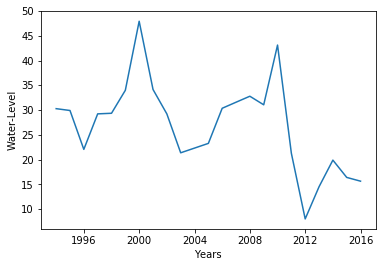

In [9]:
plt.xlabel('Years')
plt.ylabel('Water-Level')
plt.plot(indexedDataset)

- A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past!

- We can check stationarity using the following:

- - Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. This is more of a visual technique.
- - Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TimeSeries is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [10]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    
    #Determing rolling statistics
    moving_average=timeseries.rolling(window=12).mean()
    standard_deviation=timeseries.rolling(window=12).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries,color='blue',label="Original")
    plt.plot(moving_average,color='red',label='Mean')
    plt.plot(standard_deviation,color='black',label='Standard Deviation')
    plt.legend(loc='best')  #best for axes
    plt.title('Rolling Mean & Deviation')
#     plt.show()
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results Of Dickey-Fuller Test')
    tstest=adfuller(timeseries['MONSOON'],autolag='AIC')
    tsoutput=pd.Series(tstest[0:4],index=['Test Statistcs','P-value','#Lags used',"#Obs. used"])
    #Test Statistics should be less than the Critical Value for Stationarity
    #lesser the p-value, greater the stationarity
    # print(list(dftest))
    for key,value in tstest[4].items():
        tsoutput['Critical Value (%s)'%key]=value
    print((tsoutput))

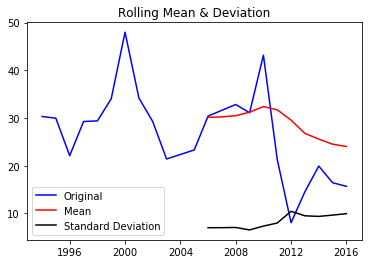

Results Of Dickey-Fuller Test
Test Statistcs           1.749620
P-value                  0.998244
#Lags used               9.000000
#Obs. used              12.000000
Critical Value (1%)     -4.137829
Critical Value (5%)     -3.154972
Critical Value (10%)    -2.714477
dtype: float64


In [11]:
test_stationary(indexedDataset)

- There are 2 major reasons behind non-stationaruty of a TS:
- - Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
- - Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

## Indexed Dataset Logscale

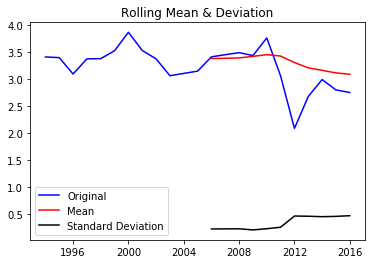

Results Of Dickey-Fuller Test
Test Statistcs           1.514525
P-value                  0.997577
#Lags used               9.000000
#Obs. used              12.000000
Critical Value (1%)     -4.137829
Critical Value (5%)     -3.154972
Critical Value (10%)    -2.714477
dtype: float64


In [12]:
indexedDataset_logscale=np.log(indexedDataset)
test_stationary(indexedDataset_logscale)

## Dataset Log Minus Moving Average (dl_ma)

In [13]:
rolmeanlog=indexedDataset_logscale.rolling(window=12).mean()
dl_ma=indexedDataset_logscale-rolmeanlog
dl_ma.head(12)

,MONSOON
YEAR_OBS,
1994-01-01,NaN
1995-01-01,NaN
1996-01-01,NaN
1997-01-01,NaN
1998-01-01,NaN
1999-01-01,NaN
2000-01-01,NaN
2001-01-01,NaN
2002-01-01,NaN


In [14]:
dl_ma.dropna(inplace=True)
dl_ma.head(12)

,MONSOON
YEAR_OBS,
2006-01-01,0.031353
2007-01-01,0.067213
2008-01-01,0.097124
2009-01-01,0.014492
2010-01-01,0.309917
2011-01-01,-0.369258
2012-01-01,-1.222187
2013-01-01,-0.530870
2014-01-01,-0.171743


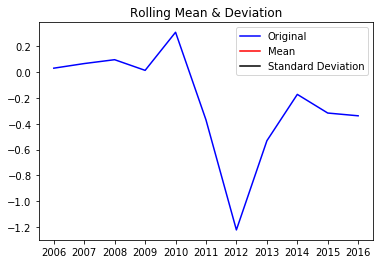

Results Of Dickey-Fuller Test
Test Statistcs         -0.000000
P-value                 0.958532
#Lags used              5.000000
#Obs. used              5.000000
Critical Value (1%)    -6.045114
Critical Value (5%)    -3.929280
Critical Value (10%)   -2.986810
dtype: float64


In [15]:
test_stationary(dl_ma)

## Exponential Decay Weighted Average (edwa)

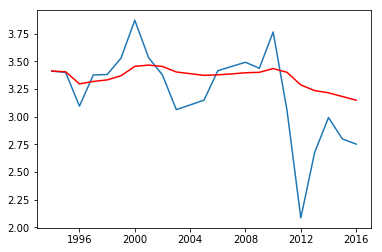

In [16]:
edwa=indexedDataset_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(edwa,color='red')

## Dataset Logscale Minus Moving Exponential Decay Average (dlmeda)

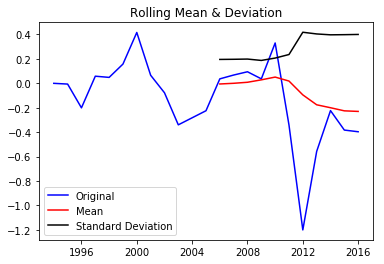

Results Of Dickey-Fuller Test
Test Statistcs           4.916220
P-value                  1.000000
#Lags used               9.000000
#Obs. used              12.000000
Critical Value (1%)     -4.137829
Critical Value (5%)     -3.154972
Critical Value (10%)    -2.714477
dtype: float64


In [17]:
dlmeda=indexedDataset_logscale-edwa
test_stationary(dlmeda)

## Eliminating Trend and Seasonality

- Differencing – taking the differece with a particular time lag
- Decomposition – modeling both trend and seasonality and removing them from the model.

# Differencing

## Dataset Log Div Shifting (dlds)

In [18]:
#Before Shifting
indexedDataset_logscale.head()

,MONSOON
YEAR_OBS,
1994-01-01,3.411478
1995-01-01,3.399195
1996-01-01,3.095125
1997-01-01,3.376221
1998-01-01,3.380314


In [19]:
#After Shifting
indexedDataset_logscale.shift().head()

,MONSOON
YEAR_OBS,
1994-01-01,NaN
1995-01-01,3.411478
1996-01-01,3.399195
1997-01-01,3.095125
1998-01-01,3.376221


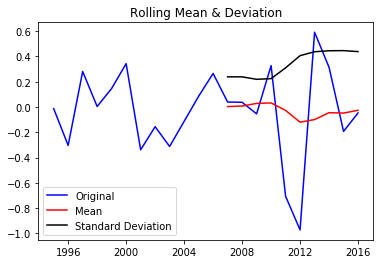

Results Of Dickey-Fuller Test
Test Statistcs           0.000000
P-value                  0.958532
#Lags used               9.000000
#Obs. used              11.000000
Critical Value (1%)     -4.223238
Critical Value (5%)     -3.189369
Critical Value (10%)    -2.729839
dtype: float64


In [20]:
dlds=indexedDataset_logscale-indexedDataset_logscale.shift()
dlds.dropna(inplace=True)
test_stationary(dlds)

# Decomposition

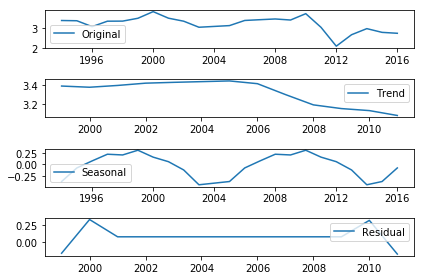

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompostion= seasonal_decompose(indexedDataset_logscale,freq=10)

trend=decompostion.trend
seasonal=decompostion.seasonal
residual=decompostion.resid

plt.subplot(411)
plt.plot(indexedDataset_logscale,label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout() #To Show Multiple Grpahs In One Output, Use plt.subplot(abc)

- Here trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residuals:

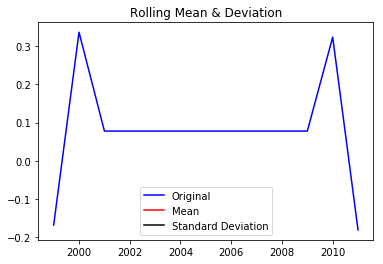

Results Of Dickey-Fuller Test
Test Statistcs         -0.000000
P-value                 0.958532
#Lags used              7.000000
#Obs. used              4.000000
Critical Value (1%)    -7.355441
Critical Value (5%)    -4.474365
Critical Value (10%)   -3.126933
dtype: float64


In [22]:
decomposedlogdata=residual
decomposedlogdata.dropna(inplace=True)
test_stationary(decomposedlogdata)

# Forecasting a Time Series

- ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

- - Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
- - Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
- - Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.


- An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers.

- - Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself-. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
- - Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

## ACF & PACF Plots

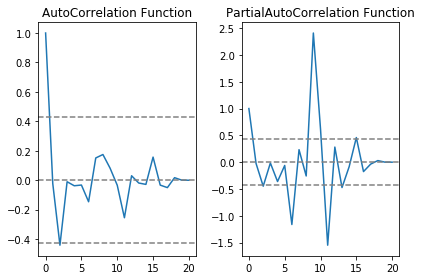

In [23]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(dlds,nlags=20)
lag_pacf=pacf(dlds,nlags=20,method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dlds)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dlds)),linestyle='--',color='gray')
plt.title('AutoCorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dlds)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dlds)),linestyle='--',color='gray')
plt.title('PartialAutoCorrelation Function')

plt.tight_layout()

- In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

- - p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If we notice closely, in this case p=2.
- - q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If we notice closely, in this case q=2.

Plotting AR Model


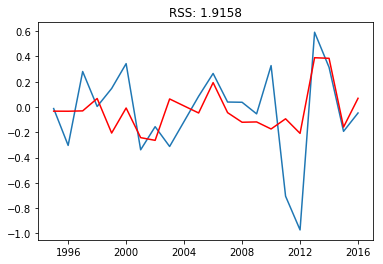

In [24]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(indexedDataset_logscale,order=(5,1,0))
results_AR=model.fit(disp=-1)
plt.plot(dlds)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-dlds['MONSOON'])**2))
# RSS - Residual Sum Of Squares
print('Plotting AR Model')

Plotting MA Model


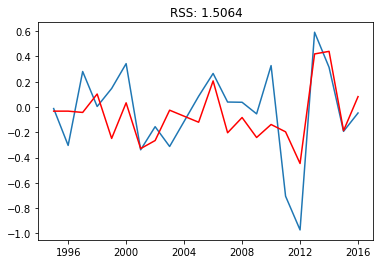

In [25]:
model = ARIMA(indexedDataset_logscale, order=(0, 1, 2))  #0,1,2
results_MA = model.fit(disp=-1)  
plt.plot(dlds)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues-dlds['MONSOON'])**2))
print('Plotting MA Model')

Plotting Combined Model


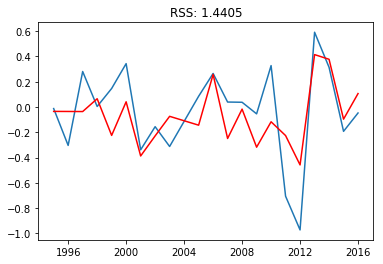

In [26]:
model = ARIMA(indexedDataset_logscale, order=(5, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(dlds)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues-dlds['MONSOON'])**2))
print('Plotting Combined Model')

# Taking it back to original scale from residual scale

In [27]:
#storing the predicted results as a separate series
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

YEAR_OBS
1995-01-01   -0.034746
1996-01-01   -0.035243
1997-01-01   -0.035947
1998-01-01    0.065440
1999-01-01   -0.224759
dtype: float64

- Notice that these start from ‘1949-02-01’ and not the first month. Why? This is because we took a lag by 1 and first element doesn’t have anything before it to subtract from. The way to convert the differencing to log scale is to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number.

In [28]:
#convert to cummuative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum

YEAR_OBS
1995-01-01   -0.034746
1996-01-01   -0.069990
1997-01-01   -0.105937
1998-01-01   -0.040497
1999-01-01   -0.265257
2000-01-01   -0.223960
2001-01-01   -0.611502
2002-01-01   -0.840121
2003-01-01   -0.913950
2005-01-01   -1.057793
2006-01-01   -0.799820
2007-01-01   -1.048987
2008-01-01   -1.065765
2009-01-01   -1.383820
2010-01-01   -1.500725
2011-01-01   -1.726790
2012-01-01   -2.185161
2013-01-01   -1.770268
2014-01-01   -1.392429
2015-01-01   -1.488515
2016-01-01   -1.382160
dtype: float64

In [29]:
predictions_ARIMA_log = pd.Series(indexedDataset_logscale['MONSOON'].ix[0], index=indexedDataset_logscale.index)
predictions_ARIMA_log

YEAR_OBS
1994-01-01    3.411478
1995-01-01    3.411478
1996-01-01    3.411478
1997-01-01    3.411478
1998-01-01    3.411478
1999-01-01    3.411478
2000-01-01    3.411478
2001-01-01    3.411478
2002-01-01    3.411478
2003-01-01    3.411478
2005-01-01    3.411478
2006-01-01    3.411478
2007-01-01    3.411478
2008-01-01    3.411478
2009-01-01    3.411478
2010-01-01    3.411478
2011-01-01    3.411478
2012-01-01    3.411478
2013-01-01    3.411478
2014-01-01    3.411478
2015-01-01    3.411478
2016-01-01    3.411478
dtype: float64

In [30]:
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log

YEAR_OBS
1994-01-01    3.411478
1995-01-01    3.376731
1996-01-01    3.341488
1997-01-01    3.305540
1998-01-01    3.370980
1999-01-01    3.146221
2000-01-01    3.187518
2001-01-01    2.799976
2002-01-01    2.571357
2003-01-01    2.497528
2005-01-01    2.353685
2006-01-01    2.611658
2007-01-01    2.362491
2008-01-01    2.345712
2009-01-01    2.027658
2010-01-01    1.910753
2011-01-01    1.684688
2012-01-01    1.226317
2013-01-01    1.641210
2014-01-01    2.019049
2015-01-01    1.922963
2016-01-01    2.029318
dtype: float64

- Here the first element is base number itself and from there on the values cumulatively added.

Text(0.5, 1.0, 'RMSE: 15.5486')

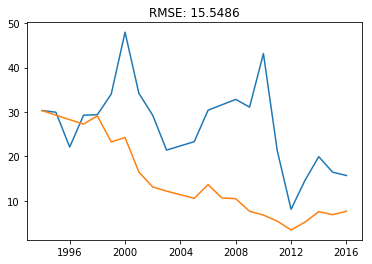

In [31]:
#Last step is to take the exponent and compare with the original series.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-indexedDataset['MONSOON'])**2)/len(indexedDataset)))

- Finally we have a forecast at the original scale.

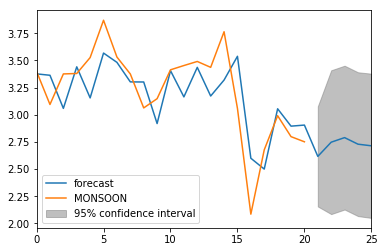

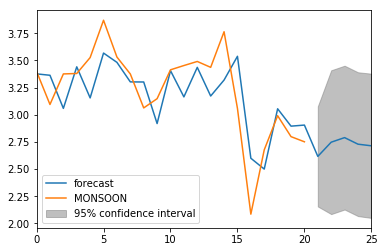

In [32]:
results_ARIMA.plot_predict(1,26)

#start = !st month
#end = 10yrs forcasting = 144+12*10 = 264th month

#Two models corresponds to AR & MA

In [33]:
x=results_ARIMA.forecast(steps=5)
print(x)
#values in residual equivalent

(array([2.61731503, 2.74811248, 2.79018171, 2.72974134, 2.71475412]), array([0.23507659, 0.33764008, 0.33764014, 0.3376707 , 0.33861065]), array([[2.15657338, 3.07805668],
       [2.08635009, 3.40987487],
       [2.12841919, 3.45194423],
       [2.06791892, 3.39156376],
       [2.05108943, 3.3784188 ]]))


In [34]:
for i in range(0,5):
    print(x[0][i],end='')
    print('\t',x[1][i],end='')
    print('\t',x[2][i])

2.617315031254026	 0.2350765910977012	 [2.15657338 3.07805668]
2.7481124785660804	 0.3376400750662718	 [2.08635009 3.40987487]
2.790181712476766	 0.3376401428052289	 [2.12841919 3.45194423]
2.7297413397725365	 0.3376707032327619	 [2.06791892 3.39156376]
2.7147541154092676	 0.3386106520100188	 [2.05108943 3.3784188 ]


In [46]:
a=list(np.exp(results_ARIMA.forecast(steps=5)[0]))

In [49]:
x=[]
for i in range(0,len(a)):
    x.append(a[i])
x

[13.698893063075001,
 15.613133928992985,
 16.28397853503212,
 15.328921524743004,
 15.10089653759884]

In [51]:
type(a[0])

numpy.float64

In [36]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.forecast(steps=5)[0], copy=True)
predictions_ARIMA_diff.head()

0    2.617315
1    2.748112
2    2.790182
3    2.729741
4    2.714754
dtype: float64

In [37]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

0     2.617315
1     5.365428
2     8.155609
3    10.885351
4    13.600105
dtype: float64

In [38]:
predictions_ARIMA_log=[]
for i in range(0,len(predictions_ARIMA_diff_cumsum)):
    predictions_ARIMA_log.append(predictions_ARIMA_diff_cumsum[i]+3.411478)
predictions_ARIMA_log

[6.028793031254025,
 8.776905509820107,
 11.567087222296873,
 14.296828562069408,
 17.011582677478675]

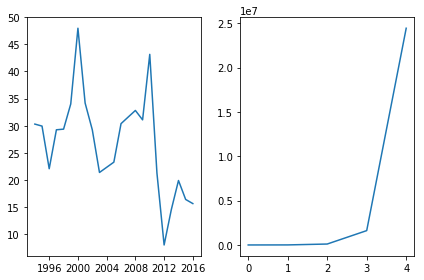

In [39]:
#Last step is to take the exponent and compare with the original series.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.subplot(121)
plt.plot(indexedDataset)
plt.subplot(122)
plt.plot(predictions_ARIMA)
plt.tight_layout()
# plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-indexedDataset['MONSOON'])**2)/len(indexedDataset)))

In [40]:
np.exp(predictions_ARIMA_log)

array([4.15213577e+02, 6.48278519e+03, 1.05565535e+05, 1.61820580e+06,
       2.44363583e+07])